In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pystan
from scipy.stats import mstats

%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('./data/real_estate1.xlsx')

In [4]:
stan_model = """
data {
  int N;
  real X[N];
  real Y[N];
  int N_s;
  real X_s[N_s];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
    Y[n] ~ normal(a * X[n] + b, sigma);
  }
}

generated quantities {
  real Y_s[N_s];
  for (n in 1:N_s){
    Y_s[n] = normal_rng(a * X_s[n] + b, sigma);
  }
}

"""

In [5]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_81acff9de421dcd46dd949b5b0a70352 NOW.


In [6]:
X_s = np.arange(40, 90, 1)
N_s = X_s.shape[0]
stan_data = {'N':df.shape[0], 'X':df['space'], 'Y':df['value'], 'N_s':N_s, 'X_s':X_s}

In [7]:
fit = sm.sampling(data=stan_data, iter=2000, warmup=500, chains=3, seed=123)

In [8]:
fit

Inference for Stan model: anon_model_81acff9de421dcd46dd949b5b0a70352.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a        77.74    0.29  11.27  55.64  70.27  77.79   85.3  99.59   1545    1.0
b       -672.0   20.61 804.34  -2193  -1219 -675.6 -139.4 922.17   1523    1.0
sigma   612.37     2.3  99.48  455.2 540.86 601.74 669.52 839.78   1873    1.0
Y_s[1]  2444.3   13.27  724.6 1002.2 1965.7 2436.9 2926.4 3849.0   2983    1.0
Y_s[2]  2511.7   12.24 700.37 1147.6 2053.3 2515.7 2958.8 3894.2   3276    1.0
Y_s[3]  2595.9   12.34 710.22 1203.8 2133.2 2600.2 3060.3 4018.6   3311    1.0
Y_s[4]  2659.0   13.28 717.38 1238.3 2192.1 2659.5 3117.3 4057.1   2920    1.0
Y_s[5]  2733.4   12.87 693.45 1366.3 2275.6 2738.5 3187.2 4073.1   2903    1.0
Y_s[6]  2833.8   12.37 699.51 1459.8 2376.1 2830.7 3282.5 4226.2   3198    1.0
Y_s[7]  2900.8   12.18

In [9]:
fit.extract('a')

OrderedDict([('a',
              array([ 77.09133032, 107.73966906,  91.28302211, ...,  67.29056738,
                      68.56209969,  65.09318035]))])

In [10]:
ms_a = fit.extract('a')['a']

In [11]:
ms_a

array([ 77.09133032, 107.73966906,  91.28302211, ...,  67.29056738,
        68.56209969,  65.09318035])

(array([   6.,   26.,  155.,  498., 1059., 1357.,  934.,  361.,   85.,
          19.]),
 array([ 32.64861892,  41.06662558,  49.48463224,  57.90263891,
         66.32064557,  74.73865223,  83.1566589 ,  91.57466556,
         99.99267222, 108.41067889, 116.82868555]),
 <a list of 10 Patch objects>)

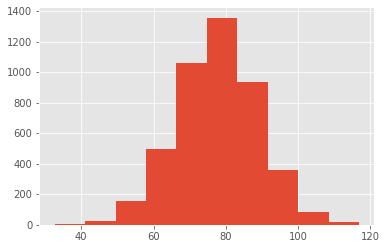

In [12]:
plt.hist(ms_a)

In [13]:
ms_b = fit.extract('b')['b']

In [14]:
df_b = pd.DataFrame([])
for i in range(40, 90, 1):
    df_b[i] = ms_a * i + ms_b

In [15]:
df_b

,40,41,42,43,44,45,46,47,48,49,...,80,81,82,83,84,85,86,87,88,89
0,2345.002879,2422.094209,2499.185540,2576.276870,2653.368200,2730.459531,2807.550861,2884.642191,2961.733521,3038.824852,...,5428.656092,5505.747422,5582.838752,5659.930083,5737.021413,5814.112743,5891.204074,5968.295404,6045.386734,6122.478065
1,1210.483741,1318.223410,1425.963079,1533.702748,1641.442418,1749.182087,1856.921756,1964.661425,2072.401094,2180.140763,...,5520.070504,5627.810173,5735.549842,5843.289511,5951.029180,6058.768849,6166.508518,6274.248187,6381.987856,6489.727525
2,2025.247961,2116.530983,2207.814005,2299.097028,2390.380050,2481.663072,2572.946094,2664.229116,2755.512138,2846.795160,...,5676.568846,5767.851868,5859.134890,5950.417912,6041.700934,6132.983956,6224.266978,6315.550000,6406.833022,6498.116045
3,1778.946943,1868.078689,1957.210435,2046.342180,2135.473926,2224.605671,2313.737417,2402.869163,2492.000908,2581.132654,...,5344.216768,5433.348514,5522.480259,5611.612005,5700.743750,5789.875496,5879.007242,5968.138987,6057.270733,6146.402478
4,2686.829769,2761.807728,2836.785688,2911.763648,2986.741607,3061.719567,3136.697526,3211.675486,3286.653446,3361.631405,...,5685.948153,5760.926113,5835.904073,5910.882032,5985.859992,6060.837951,6135.815911,6210.793871,6285.771830,6360.749790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,2376.116103,2451.372111,2526.628119,2601.884127,2677.140135,2752.396143,2827.652151,2902.908159,2978.164167,3053.420175,...,5386.356420,5461.612428,5536.868436,5612.124444,5687.380452,5762.636460,5837.892467,5913.148475,5988.404483,6063.660491
4496,2224.871867,2309.444107,2394.016348,2478.588589,2563.160830,2647.733071,2732.305312,2816.877552,2901.449793,2986.022034,...,5607.761500,5692.333741,5776.905981,5861.478222,5946.050463,6030.622704,6115.194945,6199.767186,6284.339426,6368.911667
4497,2947.100836,3014.391403,3081.681971,3148.972538,3216.263105,3283.553673,3350.844240,3418.134808,3485.425375,3552.715942,...,5638.723531,5706.014099,5773.304666,5840.595233,5907.885801,5975.176368,6042.466935,6109.757503,6177.048070,6244.338638
4498,2671.732872,2740.294972,2808.857072,2877.419172,2945.981271,3014.543371,3083.105471,3151.667570,3220.229670,3288.791770,...,5414.216860,5482.778960,5551.341059,5619.903159,5688.465259,5757.027359,5825.589458,5894.151558,5962.713658,6031.275757


In [16]:
low_y50, high_y50 = mstats.mquantiles(df_b, [0.25, 0.75], axis=0)
low_y95, high_y95 = mstats.mquantiles(df_b, [0.025, 0.975], axis=0)

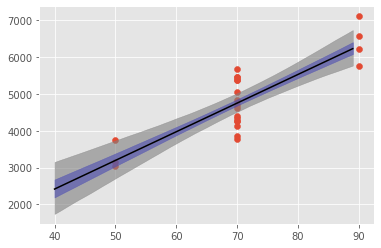

In [19]:
plt.scatter(df['space'], df['value'])
plt.fill_between(X_s, low_y50, high_y50, alpha=0.6, color='blue')
plt.fill_between(X_s, low_y95, high_y95, alpha=0.6, color='gray')
a = 77.79
b = -692.9
y = a * X_s + b
plt.plot(X_s, y, color='black')

In [20]:
Y_p = fit.extract('Y_s')['Y_s']

In [23]:
low_y ,high_y = mstats.mquantiles(Y_p, [0.025, 0.975], axis=0)

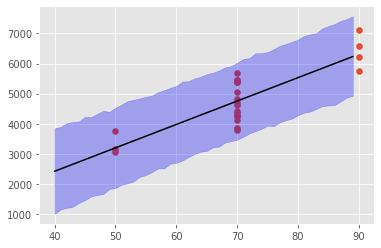

In [24]:
plt.scatter(df['space'], df['value'])
plt.fill_between(X_s, low_y, high_y, alpha=0.3, color='blue')
a = 77.79
b = -692.9
y = a * X_s + b
plt.plot(X_s, y, color='black')